In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, f1_score, roc_auc_score, classification_report, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
%matplotlib inline

In [400]:
ds = pd.read_csv('diabetes_prediction_dataset.csv')

In [401]:
ds.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [402]:
ds.shape

(100000, 9)

In [403]:
ds.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [404]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [405]:
ds.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [406]:
# Handle duplicates
duplicate_rows_data = ds[ds.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (3854, 9)


In [407]:
ds = ds.drop_duplicates()

In [408]:
# Loop through each column and count the number of distinct values
for column in ds.columns:
    num_distinct_values = len(ds[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [409]:
ds = ds[ds['gender'] != 'Other']

In [410]:
ds.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='diabetes', ylabel='count'>

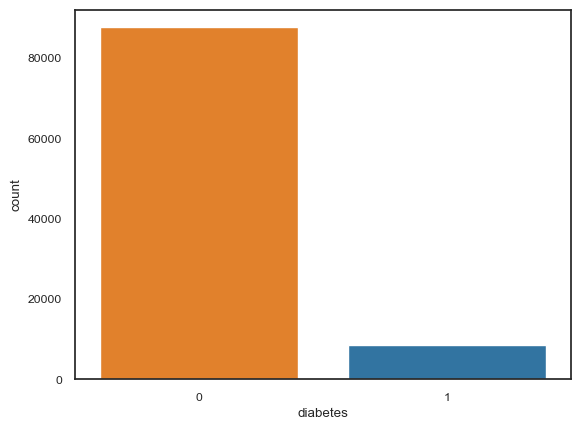

In [411]:
#countplot
sns.countplot(x='diabetes',data=ds, palette=['#FF7F0E', '#1F77B4'])

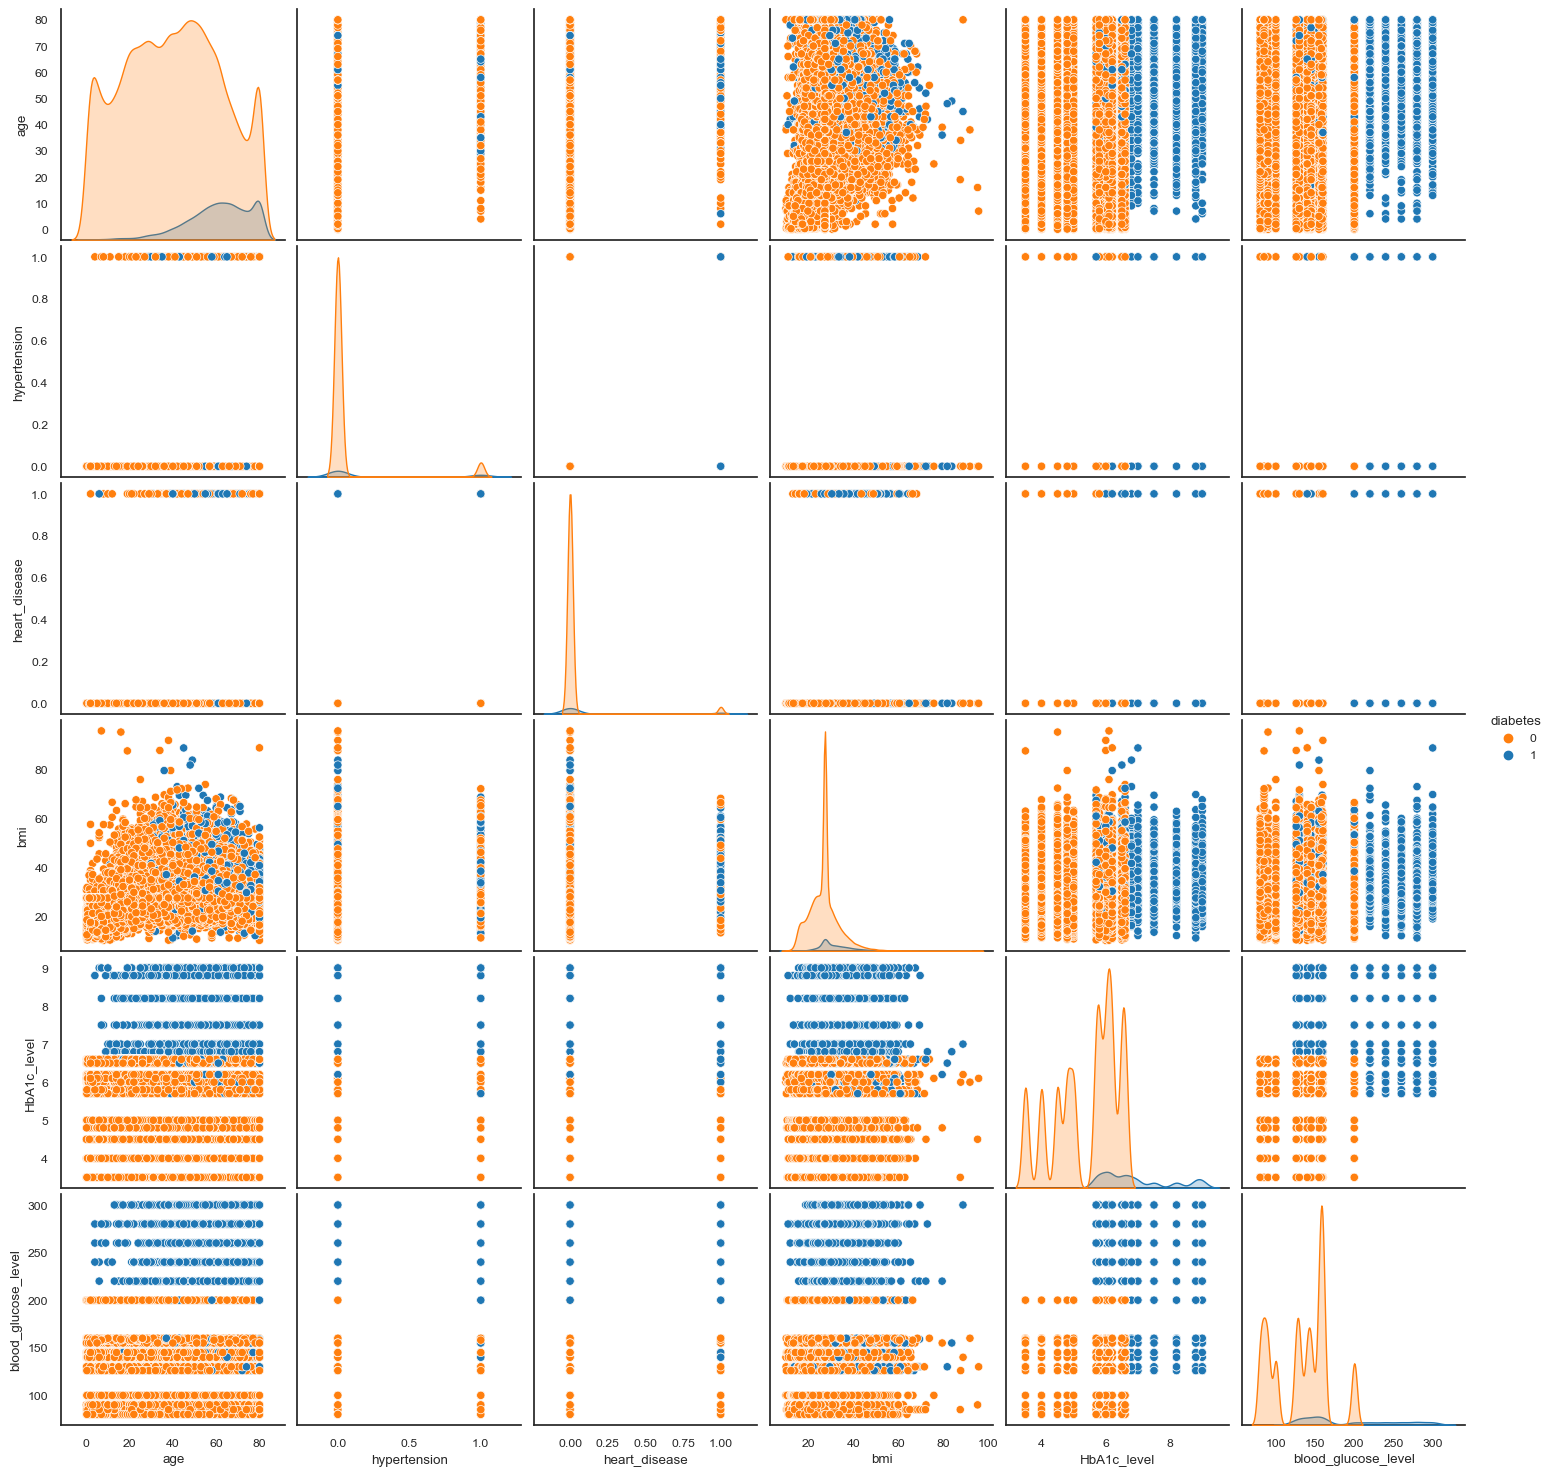

In [412]:
#pairplot
sns.pairplot(data=ds, hue='diabetes', palette=['#FF7F0E', '#1F77B4'])
plt.show()

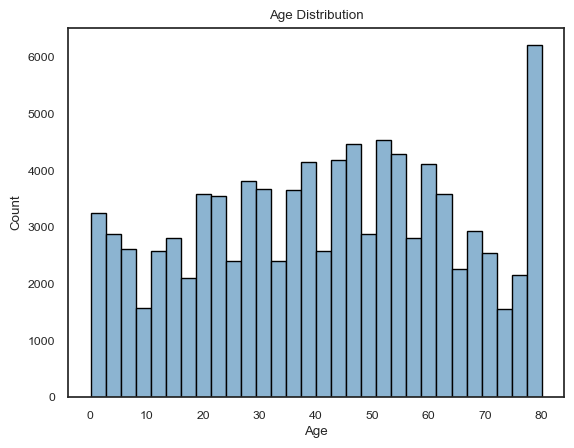

In [413]:
# Histogram for age
plt.hist(ds['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

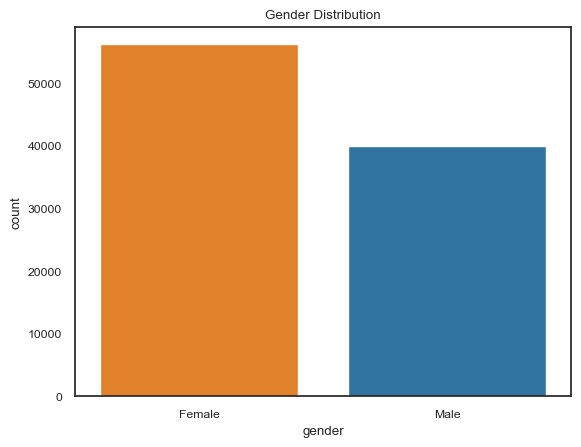

In [414]:
# Bar plot for gender
sns.countplot(x='gender', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('Gender Distribution')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17080\2070956813.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['bmi'], bins=30)


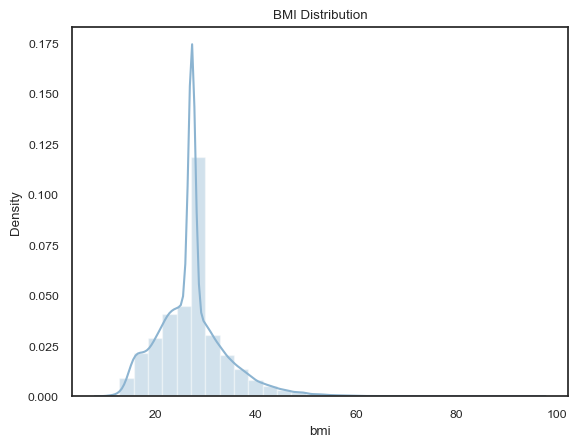

In [415]:
# Distribution plot for BMI
sns.distplot(ds['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

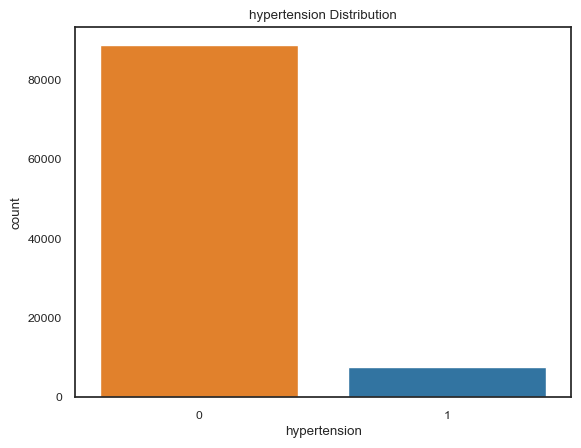

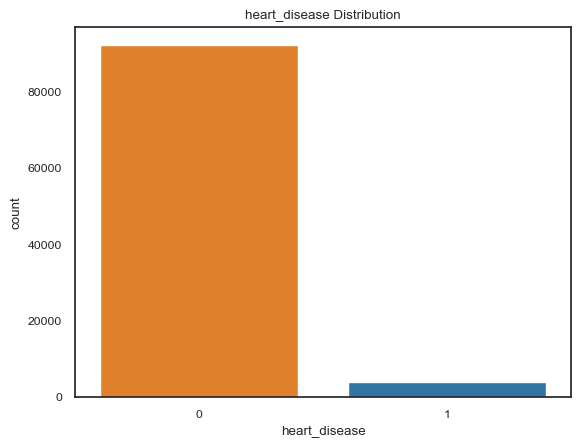

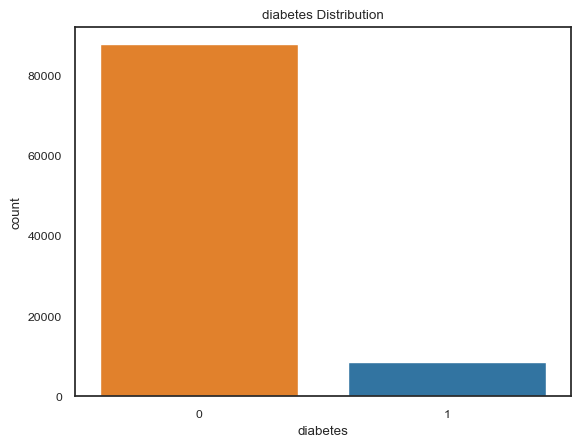

In [416]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=ds, palette=['#FF7F0E', '#1F77B4'])
    plt.title(f'{col} Distribution')
    plt.show()

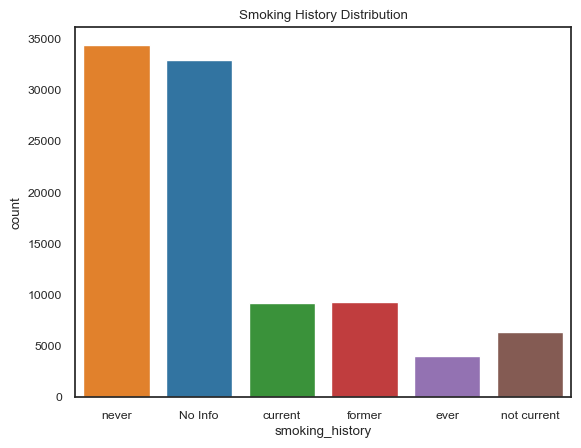

In [417]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=ds, palette=['#FF7F0E', '#1F77B4', '#2CA02C', '#D62728', '#9467BD', '#8C564B'])
plt.title('Smoking History Distribution')
plt.show()

<Axes: xlabel='HbA1c_level', ylabel='Density'>

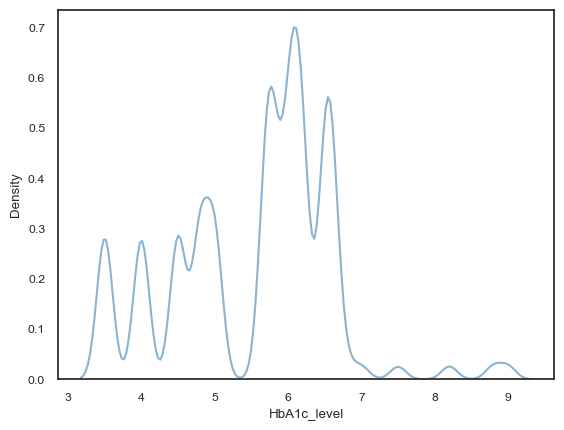

In [418]:
sns.kdeplot(x='HbA1c_level', data=ds)

<Axes: xlabel='blood_glucose_level', ylabel='Density'>

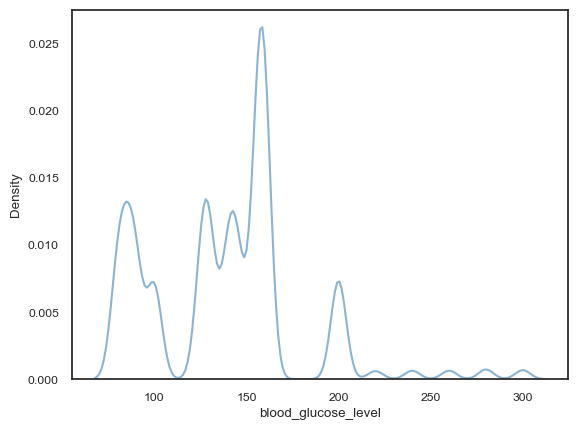

In [419]:
sns.kdeplot(x='blood_glucose_level', data=ds)

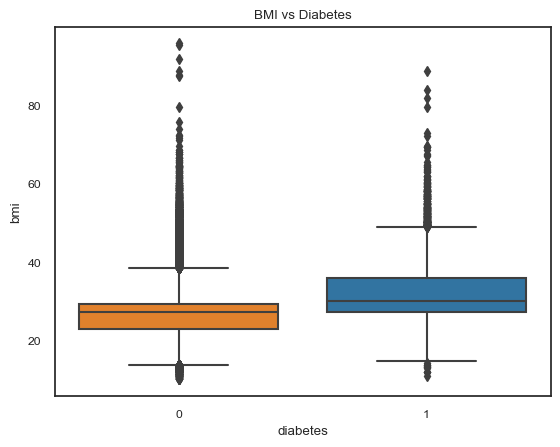

In [420]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('BMI vs Diabetes')
plt.show()

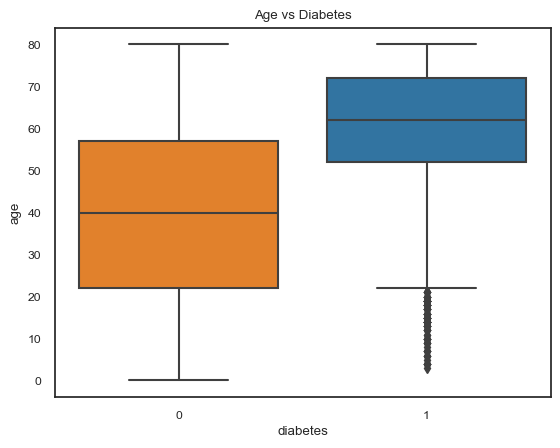

In [421]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('Age vs Diabetes')
plt.show()

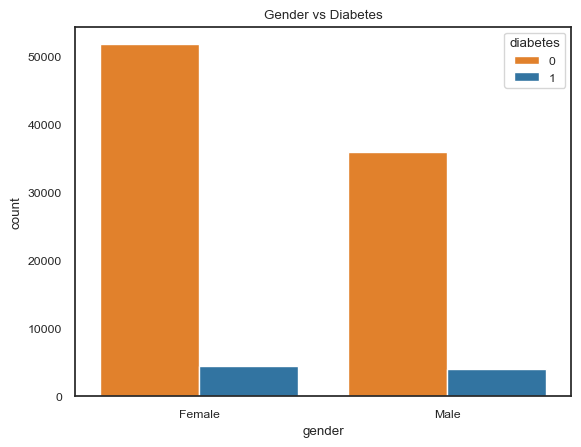

In [422]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('Gender vs Diabetes')
plt.show()

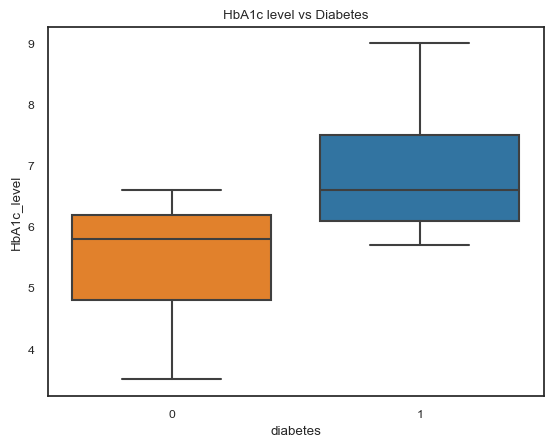

In [423]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('HbA1c level vs Diabetes')
plt.show()

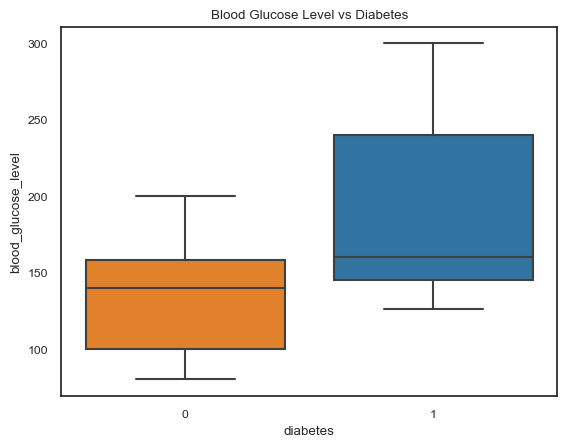

In [424]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

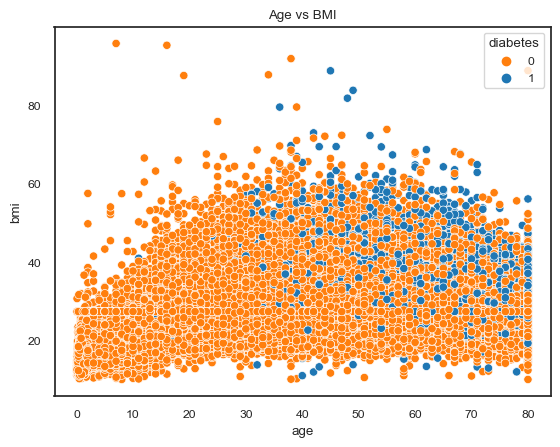

In [425]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('Age vs BMI')
plt.show()

We can see that the prevalence of diabetes increase with age. The reason for this association is multifactorial and involves a combination of biological, genetic, and lifestyle factors.

In [426]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
ds['smoking_history'] = ds['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(ds['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [427]:
#create a instance dataset, so that the original dataset is not affected
data = ds.copy()

In [428]:
def perform_one_hot_encoding(df, column_name, onehot_columns):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    
    # Append the new column names to the onehot_columns list
    onehot_columns.extend(dummies.columns)

    return df

# Initialize the onehot_columns list
onehot_columns = []

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender', onehot_columns)

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history', onehot_columns)

# Print the one-hot encoded column names
print(onehot_columns)

['gender_Female', 'gender_Male', 'smoking_history_current', 'smoking_history_non-smoker', 'smoking_history_past_smoker']


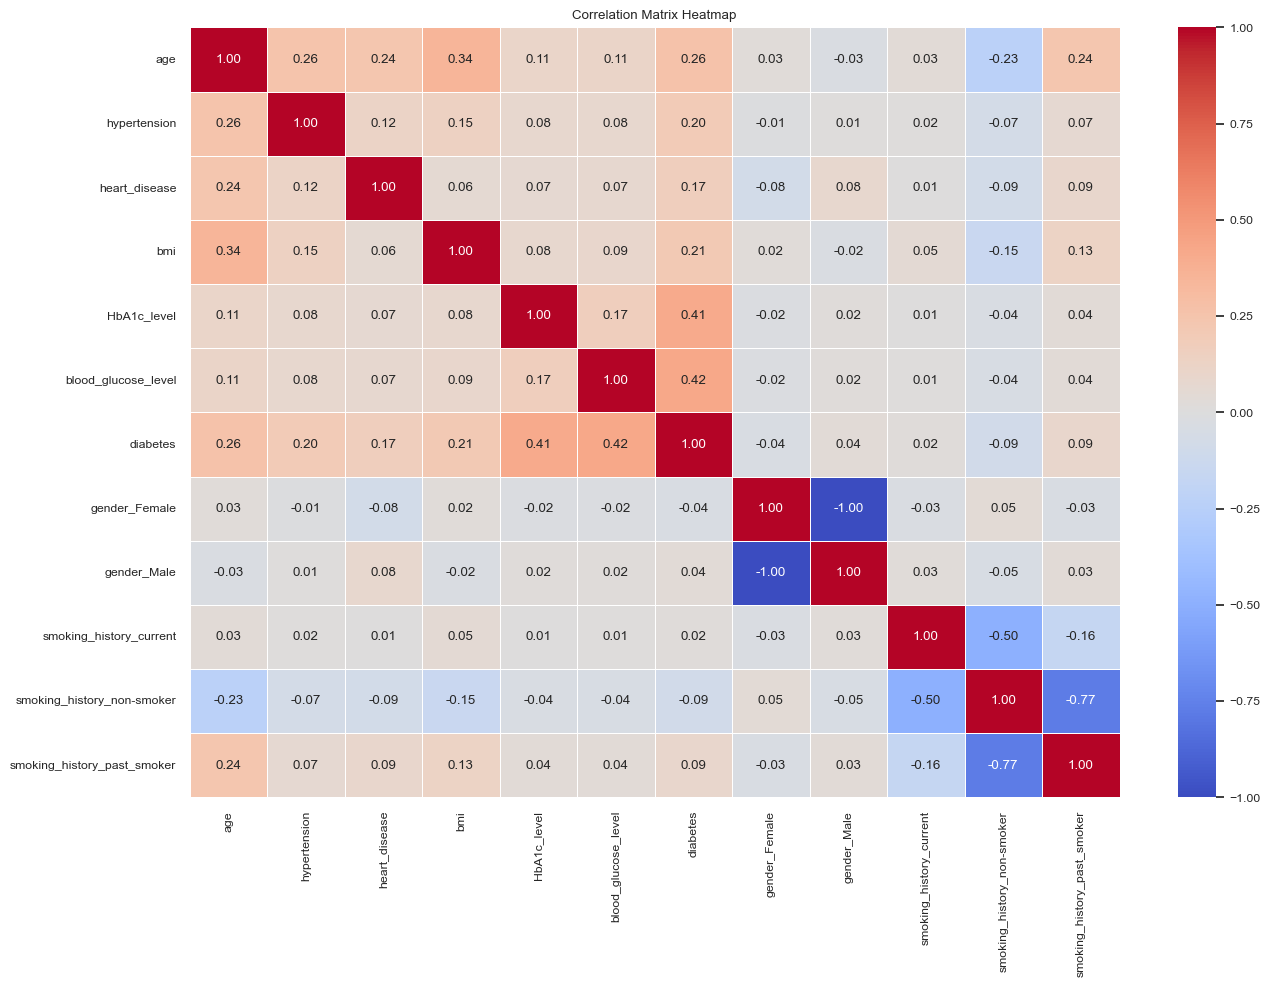

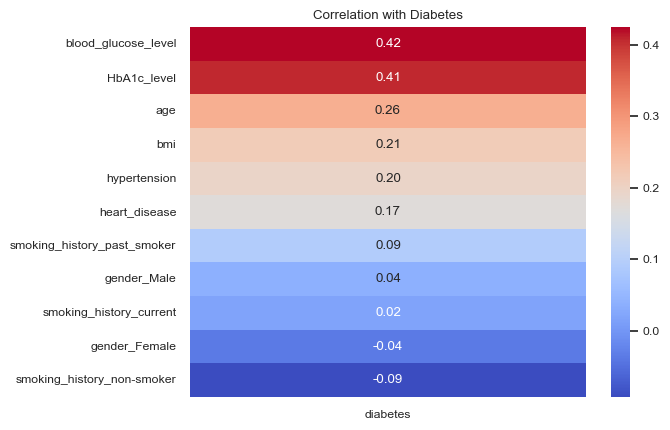

In [429]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Graph I: Correlation Matrix Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlations with the target column
target_corr = correlation_matrix['diabetes'].drop('diabetes')  # Exclude the target column

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Graph II: Correlation with Diabetes
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

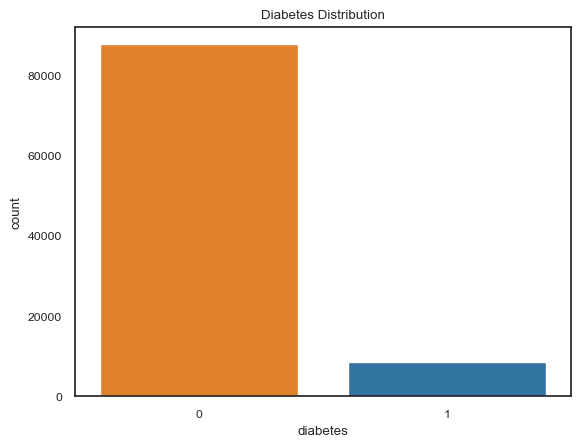

In [430]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=ds, palette=['#FF7F0E', '#1F77B4'])
plt.title('Diabetes Distribution')
plt.show()

- The dataset is remarkably imbalanced, so we are going to balance the data, so that the model is not getting high bias towards the majority class(No diabetes)
- Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class (diabetes)  

In [431]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [432]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']),
        ('cat', OneHotEncoder(), ['gender', 'smoking_history'])
    ])

In [433]:
# Split the data into features and the target variable
features = ds.drop('diabetes', axis=1)
target = ds['diabetes']

In [434]:
# Create a pipeline that preprocess the data, resamples data, and then trains a classifier
classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

In [435]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [436]:
# Create Grid Search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


In [437]:
# List of feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# Print the feature names
print(feature_names)

['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'gender_Female', 'gender_Male', 'smoking_history_current', 'smoking_history_non-smoker', 'smoking_history_past_smoker']


In [438]:
# Save the best model as a .sav file
filename = 'best_model.sav'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

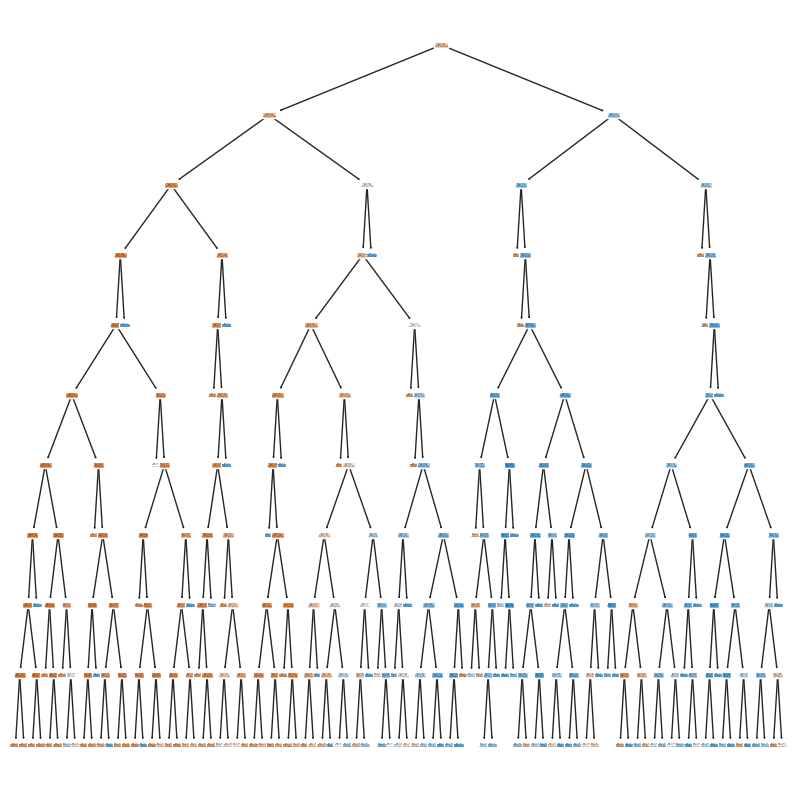

In [439]:
# Access the best estimator (Random Forest model) from the grid search
best_rf_model = grid_search.best_estimator_.named_steps['classifier']

# Display the Random Forest model
fig = plt.figure(figsize=(10, 10))
_ = tree.plot_tree(best_rf_model.estimators_[0], filled=True)
plt.show()

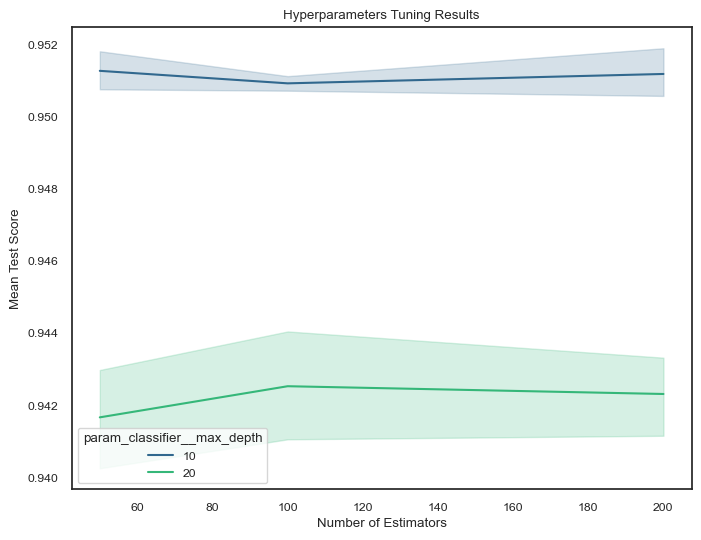

In [440]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

Model Accuracy:  0.9494954748777696
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



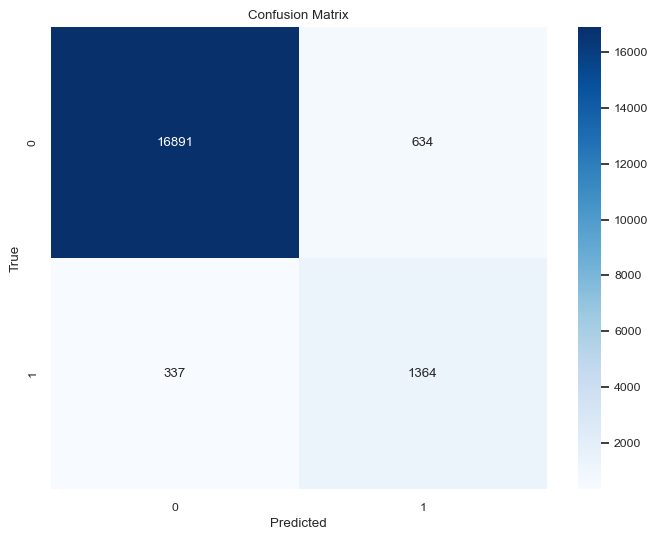

In [441]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level    0.422662
3           blood_glucose_level    0.330999
0                           age    0.128142
1                           BMI    0.062499
4                  hypertension    0.029216
5                 heart_disease    0.017375
9    smoking_history_non-smoker    0.002974
10  smoking_history_past_smoker    0.002536
6                 gender_Female    0.001516
7                   gender_Male    0.001369
8       smoking_history_current    0.000712


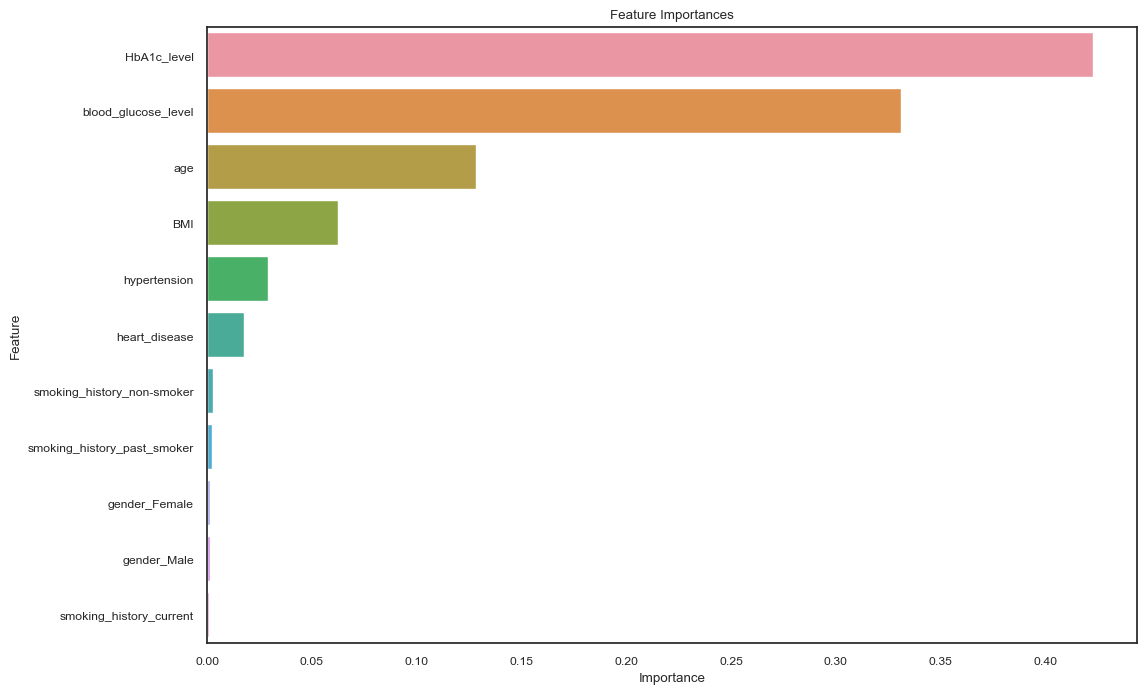

In [442]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()